In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


<h2>Data Storage</h2>
<body>storage in a DataFrame and looking for missing values</body>
<hr color="ff9500">

In [48]:
housesdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/houses_price.csv'
)

In [49]:
housesdata.shape

(128, 8)

In [50]:
housesdata.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [51]:
housesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [52]:
housesdata.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [53]:
#NaN values
housesdata.isna().value_counts()

Home   Price  SqFt   Bedrooms  Bathrooms  Offers  Brick  Neighborhood
False  False  False  False     False      False   False  False           128
dtype: int64

In [54]:
#null values
housesdata.isnull().value_counts()

Home   Price  SqFt   Bedrooms  Bathrooms  Offers  Brick  Neighborhood
False  False  False  False     False      False   False  False           128
dtype: int64

In [159]:
housesdata['Brick'].value_counts()

No     86
Yes    42
Name: Brick, dtype: int64

In [160]:
housesdata['Neighborhood'].value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [55]:
size = housesdata['SqFt']
size.head()

0    1790
1    2030
2    1740
3    1980
4    2130
Name: SqFt, dtype: int64

In [56]:
price = housesdata['Price']
bedroom = housesdata['Bedrooms']
bathroom = housesdata['Bathrooms']

In [123]:
offer = housesdata['Offers']
neghb = housesdata['Neighborhood'].value_counts()

<h2>Data Explore</h2>
<body></body>
<hr color="ff9500">

<h5 align="center">Plot of size, bedroom and price</h5>

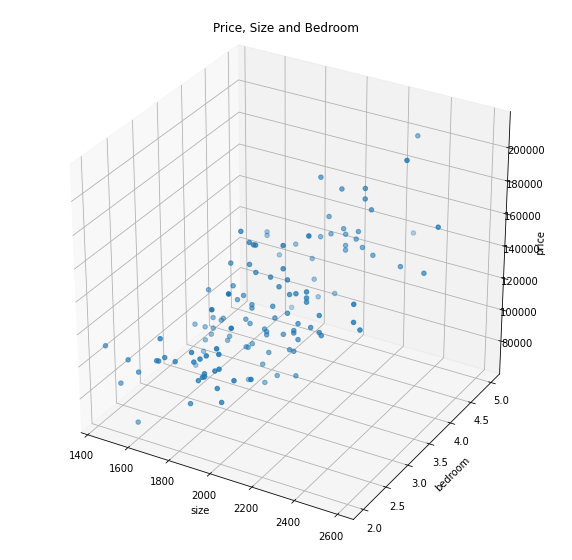

In [354]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')

ax.scatter(size, bedroom, price)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')
ax.set_title('\nPrice, Size and Bedroom\n')

plt.show()

<h5 align="center">Linear Regression</h5>

Text(0, 0.5, 'price')

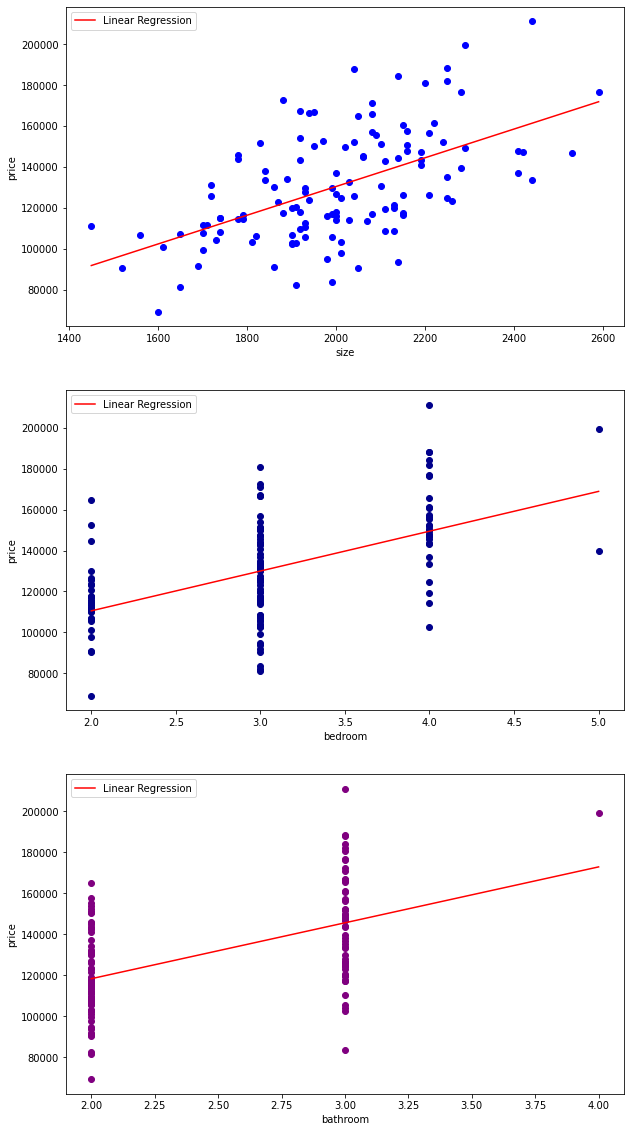

In [74]:
plt.figure(figsize=[10,20])
plt.subplot(3,1,1)
plt.plot(size,price, 'ro', color='blue')
plt.plot(np.unique(size), np.poly1d(np.polyfit(size,price,1))(np.unique(size)),
         color='red',
         label='Linear Regression')
plt.legend(loc='upper left')
plt.xlabel('size')
plt.ylabel('price')

plt.subplot(3,1,2)
plt.plot(bedroom,price, 'ro', color='darkblue')
plt.plot(np.unique(bedroom), np.poly1d(np.polyfit(bedroom,price,1))(np.unique(bedroom)),
         color='red',
         label='Linear Regression')
plt.legend(loc='upper left')

plt.xlabel('bedroom')
plt.ylabel('price')

plt.subplot(3,1,3)
plt.plot(bathroom,price, 'ro', color='purple')
plt.plot(np.unique(bathroom), np.poly1d(np.polyfit(bathroom,price,1))(np.unique(bathroom)),
         color='red',
         label='Linear Regression')
plt.legend(loc='upper left')
plt.xlabel('bathroom')
plt.ylabel('price')

<h5 align="center">Price, Size and quantity of Houses <br>values relative to the mean</h5>

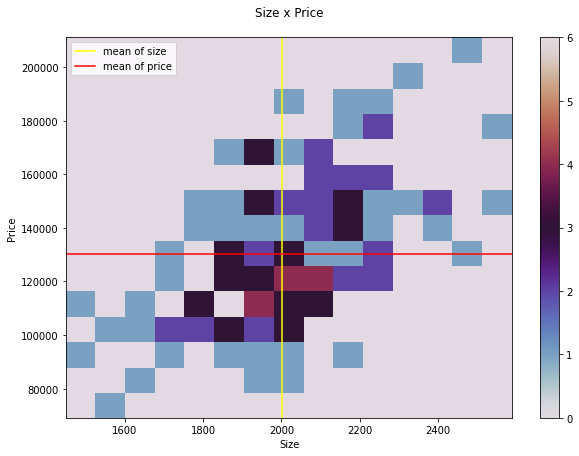

In [239]:
plt.figure(figsize=[10,7])
plt.hist2d(housesdata['SqFt'], housesdata['Price'],
           bins=(15,15), cmap=plt.cm.twilight)
plt.colorbar()
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size x Price\n')
plt.axvline(housesdata['SqFt'].mean(), color='yellow', label='mean of size')
plt.axhline(housesdata['Price'].mean(), color='red', label='mean of price')
plt.legend(loc='upper left')

<h5 align="center">Price, number of Bedrooms and quantity of Houses <br>values relative to the mean</h5>

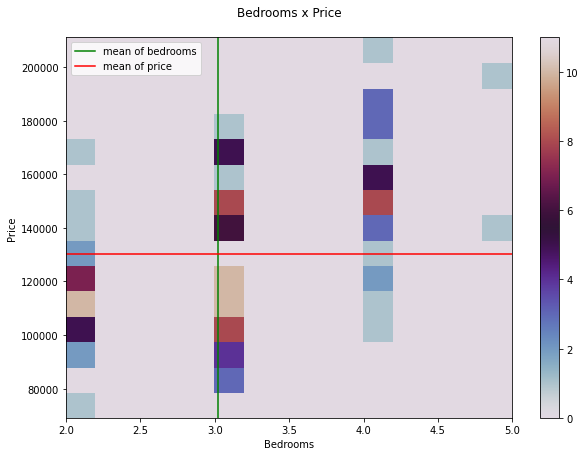

In [237]:
plt.figure(figsize=[10,7])
plt.hist2d(housesdata['Bedrooms'], housesdata['Price'],
           bins=(15,15),
           cmap=plt.cm.twilight)
plt.colorbar()
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms x Price\n')
plt.axvline(housesdata['Bedrooms'].mean(), color='green', label='mean of bedrooms')
plt.axhline(housesdata['Price'].mean(), color='red', label='mean of price')

plt.plot(range(11), 'o ')
plt.legend(loc='upper left')


<h6 align="center">What are the properties with 3 bathrooms above the average price?
</h6>



In [183]:
#there is 67 houses with 3 bedrooms
mean = (housesdata['Bedrooms']==3)
mean = housesdata[mean]
mean.shape

(67, 8)

In [184]:
mean = mean['Price'].mean()
print('the average price of the houses with 3 bedrooms:\n',mean)

print('\nthe average price of all the houses in this database:\n',
      housesdata['Price'].mean())

the average price of the houses with 3 bedrooms:
 125732.83582089552

the average price of all the houses in this database:
 130427.34375


<h5 align="center">The 3-bedroom home neighborhoods that are <br>above the overall average</h5>

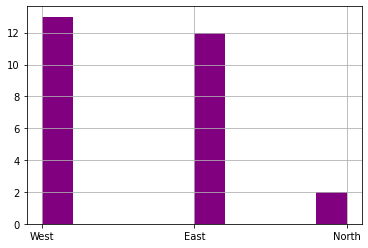

In [241]:
mask=(housesdata['Bedrooms']==3) & (housesdata['Price']>housesdata['Price'].mean())
mask = housesdata[mask]
mask['Neighborhood'].hist(color="purple")

In [ ]:
#more information
mask

<h5 align="center">The 3-bedrooms houses priced above 170000</h5>

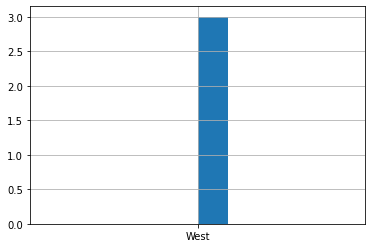

In [177]:
mask2=(housesdata['Bedrooms']==3) & (housesdata['Price']>170000)
mask2 = housesdata[mask2]
mask2['Neighborhood'].hist()

In [106]:
mask2

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
60,61,180900,2200,3,3,1,No,West
87,88,172500,1880,3,3,1,Yes,West
99,100,171000,2080,3,3,2,Yes,West


<h5 align="center">Price and Quantity of Bathrooms <br> values relative to the mean</h5>

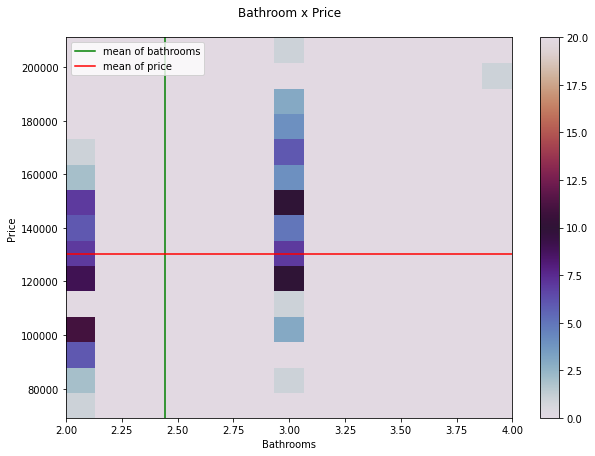

In [244]:
plt.figure(figsize=[10,7])
plt.hist2d(housesdata['Bathrooms'], housesdata['Price'], 
           bins=(15,15), cmap=plt.cm.twilight)
plt.colorbar()
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Bathroom x Price\n')
plt.axvline(housesdata['Bathrooms'].mean(), color='green', label='mean of bathrooms')
plt.axhline(housesdata['Price'].mean(), color='red', label='mean of price')
plt.legend(loc='upper left')

<h5 align="center">The house with 4 bathrooms</h5>

Text(0.5, 1.0, '\nLocation and Offers\n')

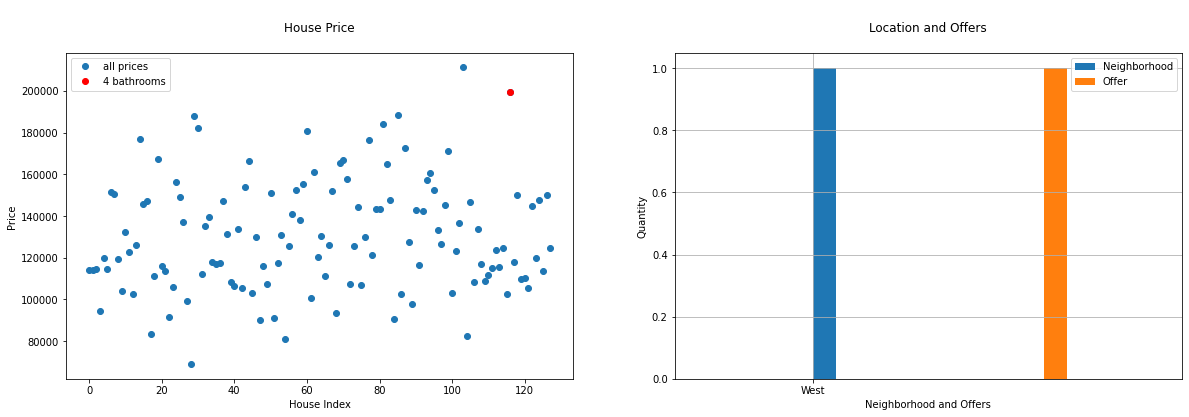

In [276]:
mask3=(housesdata['Bathrooms']==4)
housesdata[mask3]
mask3=housesdata[mask3]

plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.plot(housesdata['Price'], 'o', label='all prices')
plt.plot(mask3['Price'], 'ro', label='4 bathrooms')
plt.legend(loc='upper left')
plt.ylabel('Price')
plt.xlabel('House Index')
plt.title('\nHouse Price\n')

plt.subplot(1,2,2)
mask3['Neighborhood'].hist(label="Neighborhood")
mask3['Offers'].hist(label="Offer")
plt.legend(loc="best")
plt.ylabel('Quantity')
plt.xlabel('Neighborhood and Offers')
plt.title('\nLocation and Offers\n')

<h5 align="center">Is it worth buying 5-Bedrooms houses?<br>Price and Neighborhood</h5>

In [246]:
mask8 = housesdata['Bedrooms']==5
housesdata[mask8]

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
33,34,139600,2280,5,3,4,Yes,East
116,117,199500,2290,5,4,1,Yes,West


Text(0.5, 1.0, '\nOffers\n')

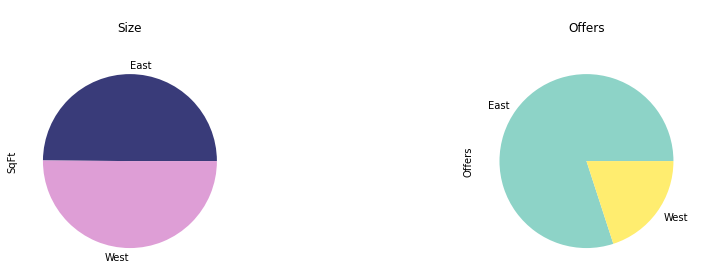

In [310]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
mask4.SqFt.plot(kind='pie', colormap='tab20b')
plt.title('\nSize\n')

plt.subplot(1,2,2)
mask4.Offers.plot(kind='pie', colormap='Set3')
plt.title('\nOffers\n')


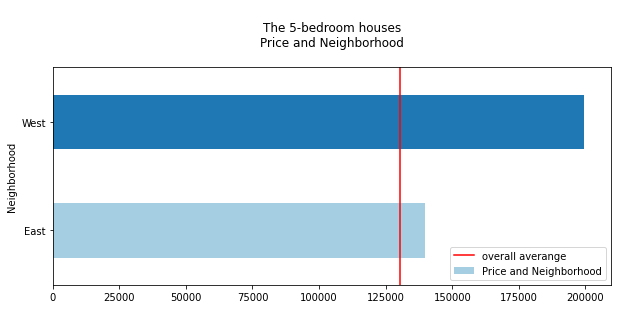

In [287]:
mask4=(housesdata['Bedrooms']==5)
mask4 = housesdata[mask4]
mask4.set_index('Neighborhood', inplace=True)

#PLOT
mask4['Price'].plot(kind='barh', figsize=[10,4],
                    color=plt.cm.Paired(np.arange(len(mask4['Price']))) ,label='Price and Neighborhood')
plt.axvline(housesdata['Price'].mean(), color='red', label='overall averange')
plt.title('\nThe 5-bedroom houses\nPrice and Neighborhood\n')
plt.legend()


<h5 align="center">Interested People<br>Frequency of offers, Prices and Neighborhoods</h5>

Text(0.5, 1.0, '\nFrequency of Offers\n')

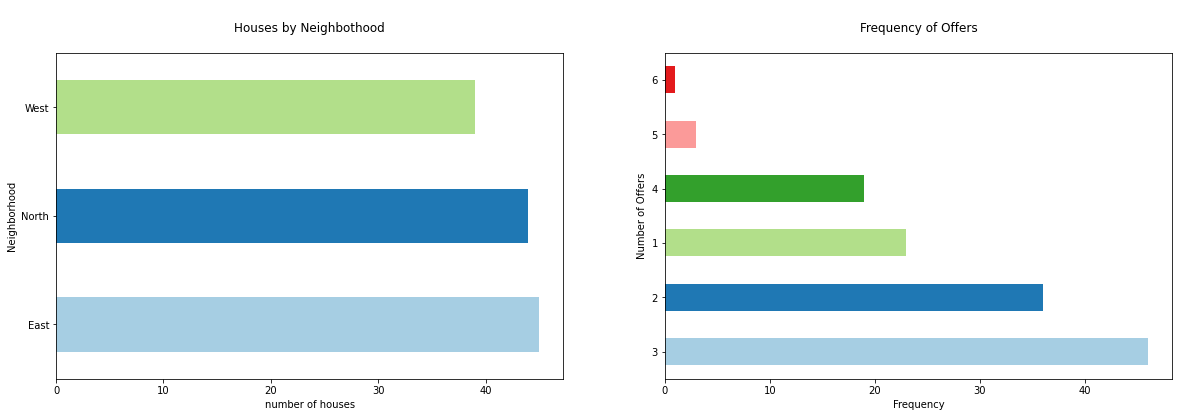

In [349]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
housesdata['Neighborhood'].value_counts().plot(kind='barh',
                              color=plt.cm.Paired(np.arange(len(housesdata['Neighborhood']))))
plt.ylabel('Neighborhood')
plt.xlabel('number of houses')
plt.title('\nHouses by Neighbothood\n')

plt.subplot(1,2,2)
housesdata['Offers'].value_counts().plot(kind='barh',
                              color=plt.cm.Paired(np.arange(len(housesdata['Offers']))))
plt.ylabel('Number of Offers')
plt.xlabel('Frequency')
plt.title('\nFrequency of Offers\n')

Text(0.5, 1.0, '\\Prices in the North Quarter\n')

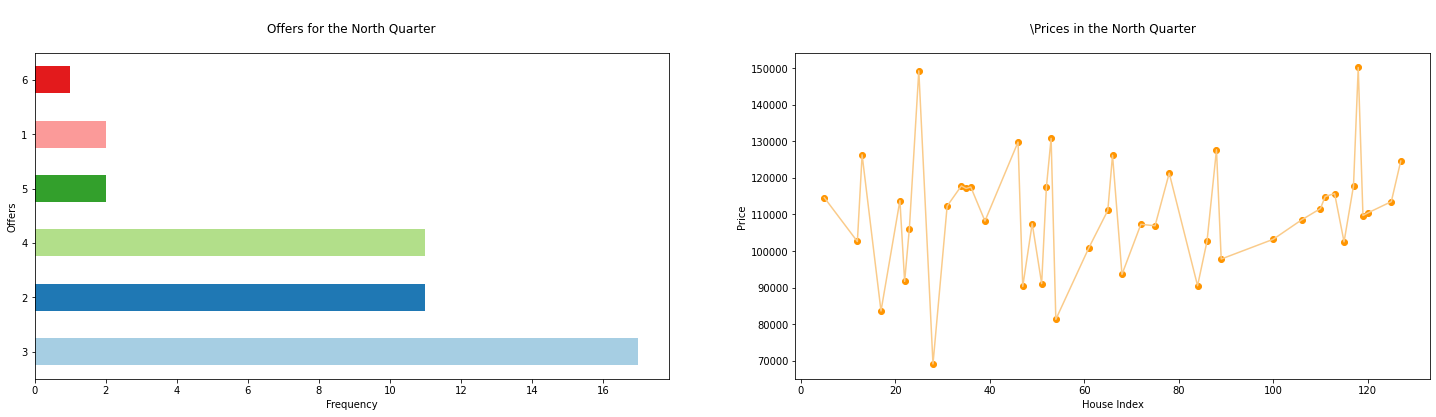

In [330]:
plt.figure(figsize=[25,6])
plt.subplot(1,2,1)
mask6 = (housesdata['Neighborhood']=='North')
mask6 = housesdata[mask6]
mask6['Offers'].value_counts().plot(kind='barh',
                              color=plt.cm.Paired(np.arange(len(mask6['Offers']))))
plt.ylabel('Offers')
plt.xlabel('Frequency')
plt.title('\nOffers for the North Quarter\n')

plt.subplot(1,2,2)
plt.plot(mask6['Price'], 'o', color='#ff9500')
plt.plot(mask6['Price'], color='#facb8a')
plt.ylabel('Price')
plt.xlabel('House Index')
plt.title('\Prices in the North Quarter\n')

Text(0.5, 1.0, '\nPrices in the West Quarter\n')

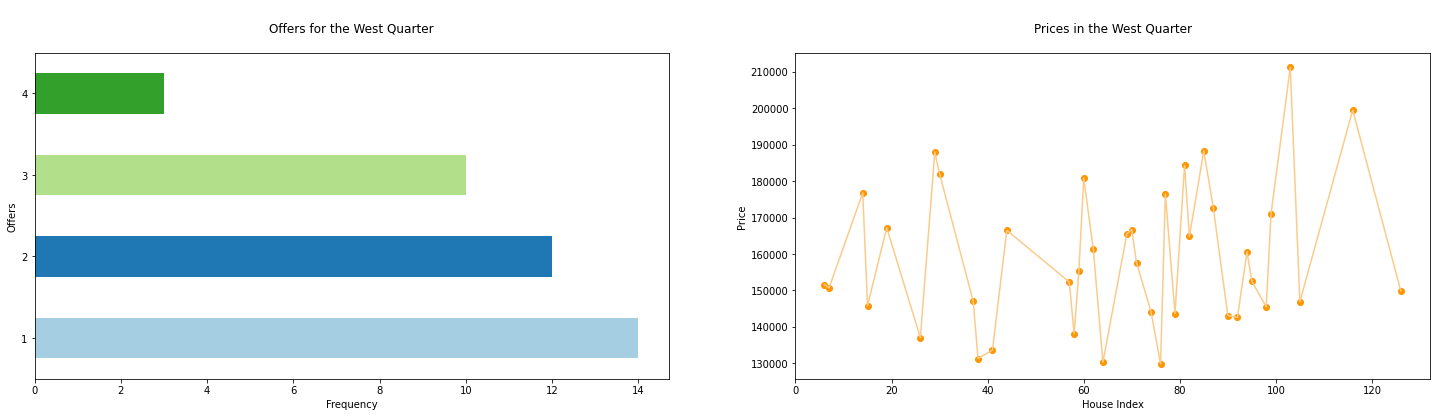

In [352]:
plt.figure(figsize=[25,6])
plt.subplot(1,2,1)
mask5 = (housesdata['Neighborhood']=='West')
mask5 = housesdata[mask5]
mask5['Offers'].value_counts().plot(kind='barh',
                              color=plt.cm.Paired(np.arange(len(mask5['Offers']))))
plt.ylabel('Offers')
plt.xlabel('Frequency')
plt.title('\nOffers for the West Quarter\n')

plt.subplot(1,2,2)
plt.plot(mask5['Price'], 'o', color='#ff9500')
plt.plot(mask5['Price'], color='#facb8a')
plt.ylabel('Price')
plt.xlabel('House Index')
plt.title('\nPrices in the West Quarter\n')

Text(0.5, 1.0, '\nPrices in the East Quarter\n')

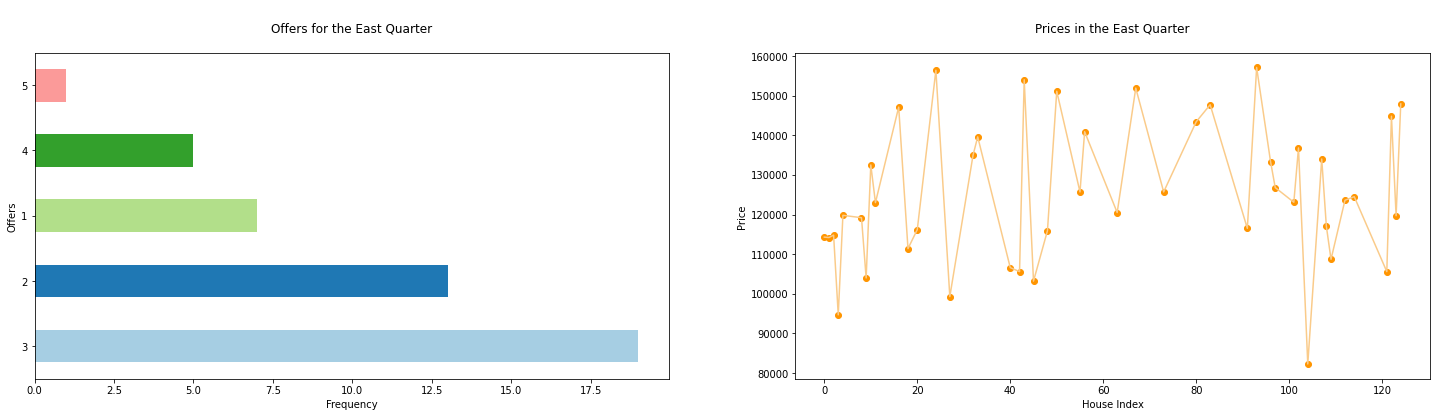

In [353]:
plt.figure(figsize=[25,6])
plt.subplot(1,2,1)
mask7 = (housesdata['Neighborhood']=='East')
mask7 = housesdata[mask7]
mask7['Offers'].value_counts().plot(kind='barh',
                              color=plt.cm.Paired(np.arange(len(mask7['Offers']))))
plt.ylabel('Offers')
plt.xlabel('Frequency')
plt.title('\nOffers for the East Quarter\n')

plt.subplot(1,2,2)
plt.plot(mask7['Price'], 'o', color='#ff9500')
plt.plot(mask7['Price'], color='#facb8a')
plt.ylabel('Price')
plt.xlabel('House Index')
plt.title('\nPrices in the East Quarter\n')